In [13]:
!pip install qiskit_aer
!pip install qiskit_ibm_runtime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.visualization import *
from qiskit_ibm_runtime import *

service = QiskitRuntimeService()



In [14]:
# Select the backend 
backend_name = 'ibm_brisbane'
backend = service.backend(backend_name)

# Get the backend properties
properties = backend.properties()

# Display the properties
print(properties)


In [24]:
t1_values = []
t2_values = []
frequency_values = []
anharmonicity_values = []
readout_assignment_error = []
sx_gate_error = []

qubits = properties.qubits
num_qubits = len(qubits)

# Loop through qubits to extract properties
for qubit in range(num_qubits):
    qubit_properties = properties.qubit_property(qubit)
    t1 = properties.t1(qubit)
    t2 = properties.t2(qubit)
    frequency = properties.frequency(qubit)
    anharmonicity = qubit_properties.get('anharmonicity', None)[0]

    t1_values.append(t1)
    t2_values.append(t2)
    frequency_values.append(frequency)
    anharmonicity_values.append(anharmonicity)

    # Readout assignment error (typically taken from the readout error section)
    readout_error = properties.readout_error(qubit)
    readout_assignment_error.append(readout_error)

    # Gate error (specific to the SX gate)
    sx_error = properties.gate_error('sx', qubit)
    sx_gate_error.append(sx_error)

# Create a DataFrame for better analysis
data = {
    'Qubit': range(num_qubits),
    'T1': t1_values,
    'T2': t2_values,
    'Frequency (GHz)': frequency_values,
    'Anharmonicity (GHz)': anharmonicity_values,
    'Readout Assignment Error': readout_assignment_error,
    'SX Gate Error': sx_gate_error
}

df = pd.DataFrame(data)

df['T1'] = pd.to_numeric(df['T1'], errors='coerce')
df['T2'] = pd.to_numeric(df['T2'], errors='coerce')


# Check again the data types
print(df.dtypes)
print(df)

Qubit                         int64
T1                          float64
T2                          float64
Frequency (GHz)             float64
Anharmonicity (GHz)         float64
Readout Assignment Error    float64
SX Gate Error               float64
dtype: object
     Qubit        T1        T2  Frequency (GHz)  Anharmonicity (GHz)  \
0        0  0.000258  0.000059     4.721908e+09        -3.119787e+08   
1        1  0.000402  0.000278     4.815136e+09        -3.097440e+08   
2        2  0.000290  0.000329     4.609655e+09        -3.090875e+08   
3        3  0.000248  0.000245     4.875546e+09        -3.096865e+08   
4        4  0.000339  0.000301     4.818176e+09        -3.103713e+08   
..     ...       ...       ...              ...                  ...   
122    122  0.000170  0.000160     4.937579e+09        -3.071313e+08   
123    123  0.000217  0.000112     5.034344e+09        -3.063946e+08   
124    124  0.000159  0.000172     4.949173e+09        -3.072861e+08   
125    125  0.

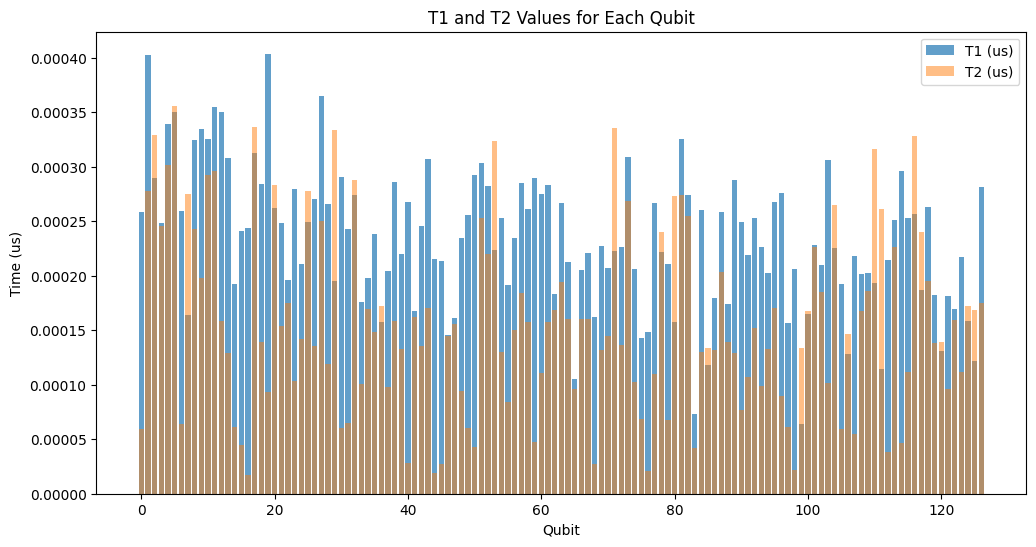

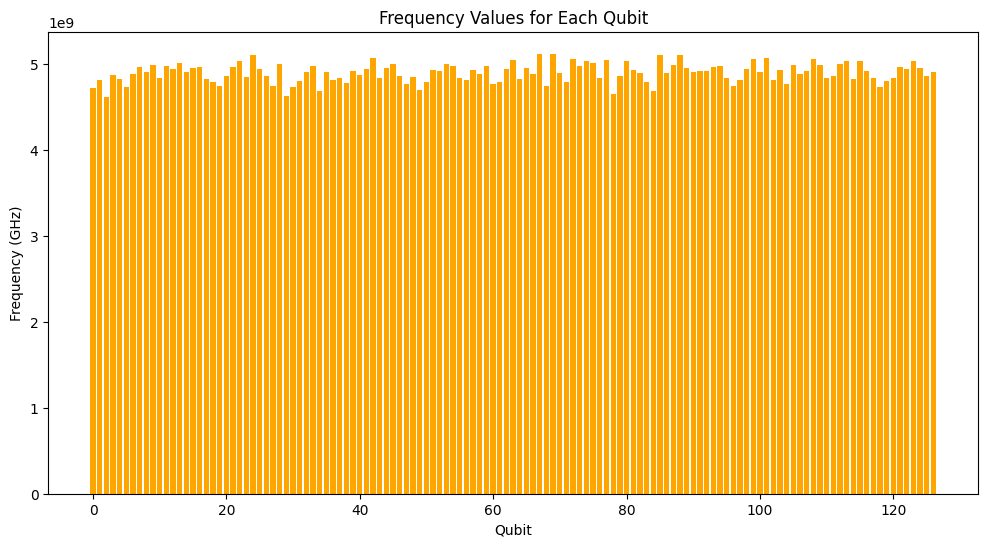

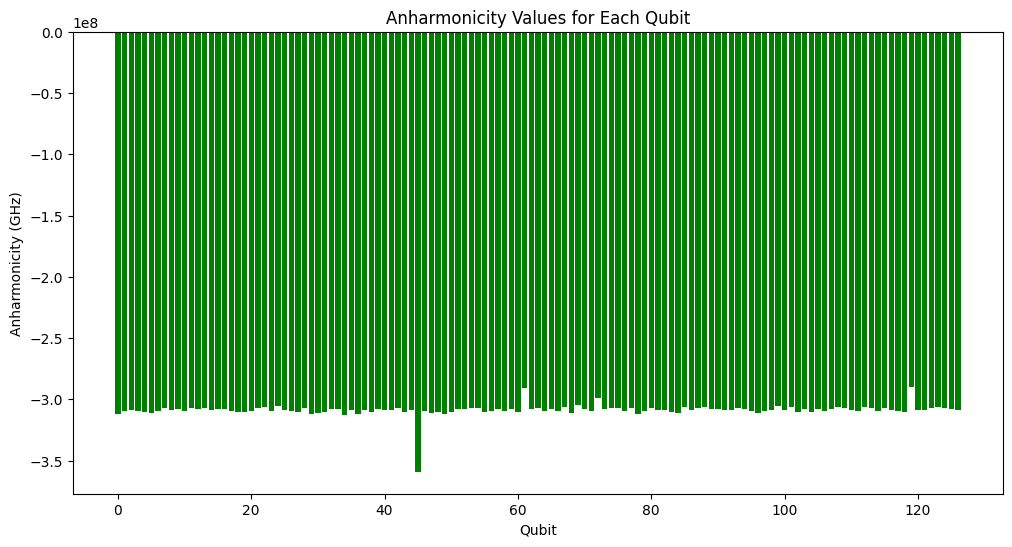

In [25]:
import matplotlib.pyplot as plt

# Plot T1 and T2 values
plt.figure(figsize=(12, 6))
plt.bar(df['Qubit'], df['T1'], label='T1 (us)', alpha=0.7)
plt.bar(df['Qubit'], df['T2'], label='T2 (us)', alpha=0.5)
plt.xlabel('Qubit')
plt.ylabel('Time (us)')
plt.title('T1 and T2 Values for Each Qubit')
plt.legend()
plt.show()

# Plot Frequency
plt.figure(figsize=(12, 6))
plt.bar(df['Qubit'], df['Frequency (GHz)'], label='Frequency (GHz)', color='orange')
plt.xlabel('Qubit')
plt.ylabel('Frequency (GHz)')
plt.title('Frequency Values for Each Qubit')
plt.show()

# Plot Anharmonicity
plt.figure(figsize=(12, 6))
plt.bar(df['Qubit'], df['Anharmonicity (GHz)'], label='Anharmonicity (GHz)', color='green')
plt.xlabel('Qubit')
plt.ylabel('Anharmonicity (GHz)')
plt.title('Anharmonicity Values for Each Qubit')
plt.show()

In [28]:
columns_of_interest = ['T1', 'T2', 'Frequency (GHz)', 'Anharmonicity (GHz)']

subset_df = df[columns_of_interest]
correlation_matrix = subset_df.corr()

print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                            T1        T2  Frequency (GHz)  Anharmonicity (GHz)
T1                   1.000000  0.260017        -0.178893            -0.028149
T2                   0.260017  1.000000        -0.118568             0.088635
Frequency (GHz)     -0.178893 -0.118568         1.000000             0.179237
Anharmonicity (GHz) -0.028149  0.088635         0.179237             1.000000
